In [1]:
# from bao import *
from static import *
from stock_data import *
from efficient_frontier import *

with open(PATH_DICTIONARY, "r") as a:
    name_dict = json.load(a)

In [2]:
stock = StockData("./data/stock/", "./stock_dictionary.json")
stock_data = stock.get_data()

In [3]:
with open(PATH_INDEX, "r") as a:
    index_l = json.load(a)

In [4]:
stock_data.drop(columns=["symbol"], inplace=True)

In [5]:
df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN30"]))
]
# makes sure to only use stocks that have market value > 0
weights = df.pivot_table(index="time", values="market_value", columns="ticker")
weights.dropna(axis=1, inplace=True)
weights = weights.div(weights.sum(axis=0), axis=1)

returns_df = df[df["ticker"].isin(weights.columns)].pivot_table(
    index="time", values="log_return", columns="ticker"
)

In [6]:
market_df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN100"]))
][["ticker", "market_value", "log_return", "time"]]

Results array shape: (97, 33)


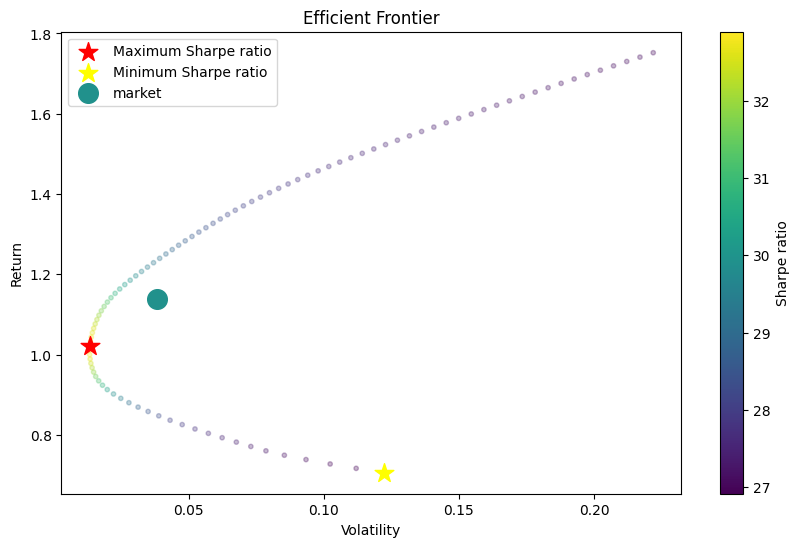

In [7]:
result, market_port = efficient_frontier(
    returns_df, market_df, num_portfolios=100, risk_free_rate=0.01, range0=(0, 1)
)

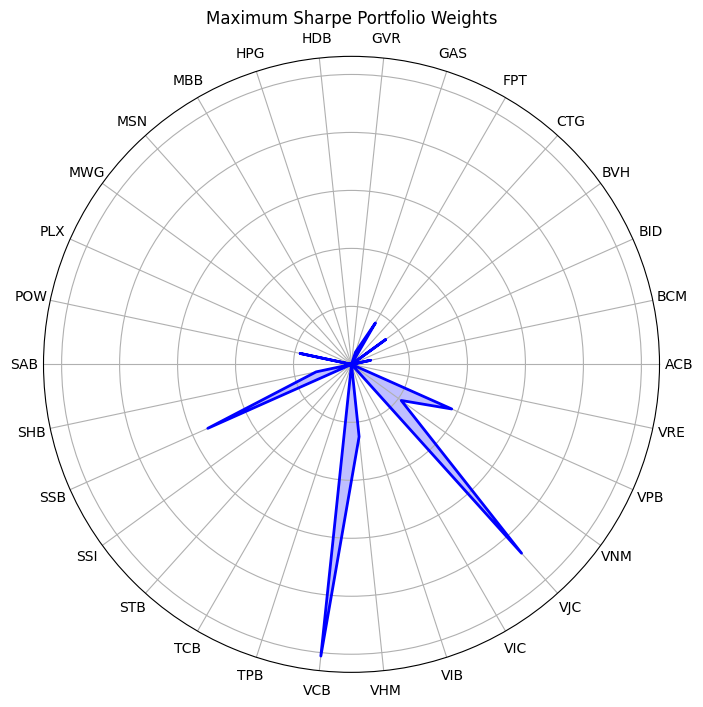

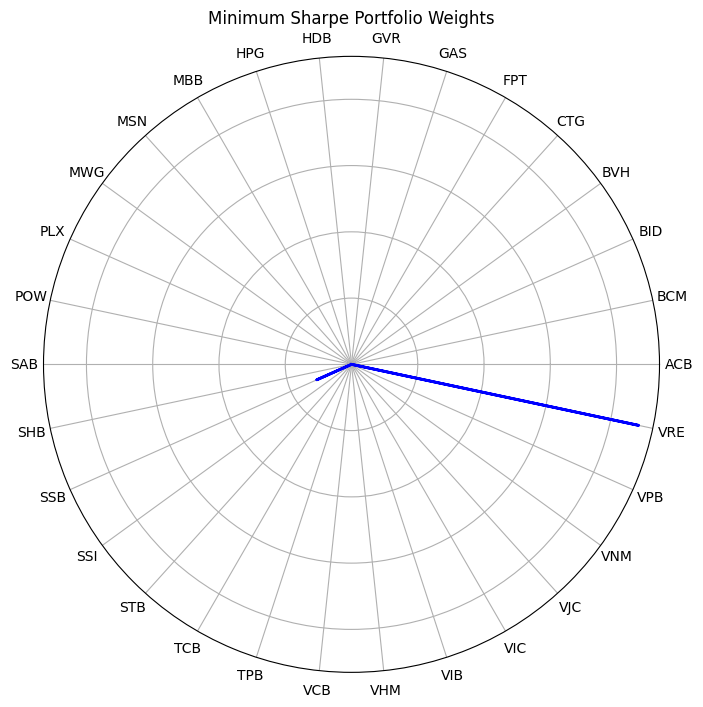

In [8]:
# Get the weights from the Maximum Sharpe portfolio
plot_portfolio_weights(
    result["Maximum Sharpe"]["Weights"], title="Maximum Sharpe Portfolio Weights"
)
plot_portfolio_weights(
    result["Minimum Sharpe"]["Weights"], title="Minimum Sharpe Portfolio Weights"
)

### With Constrain for each stock to be at least 1% of whole portfolio

/usr/local/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/usr/local/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/usr/local/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:492: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])
/usr/local/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/usr/local/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/usr/local/lib/python

Results array shape: (69, 33)


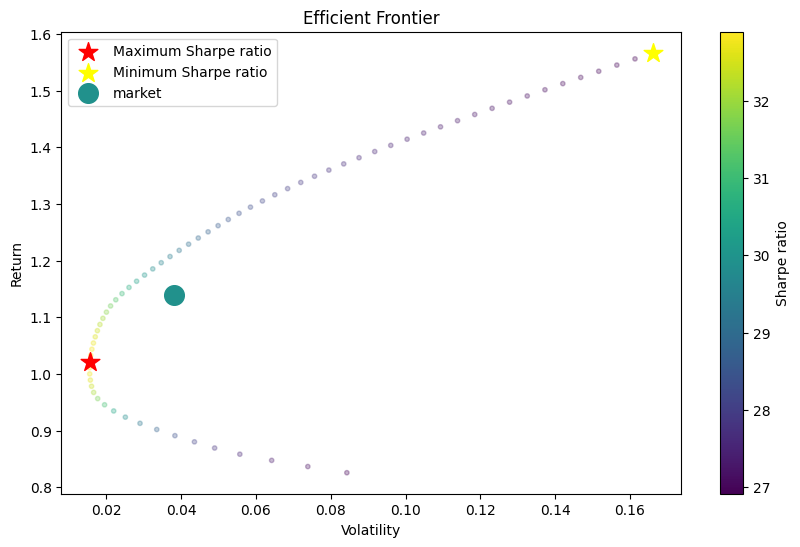

In [9]:
# with minimum weight of stock is 1%
result, market_stat = efficient_frontier(
    returns_df, market_df, num_portfolios=100, risk_free_rate=0.01
)
# ic(result)

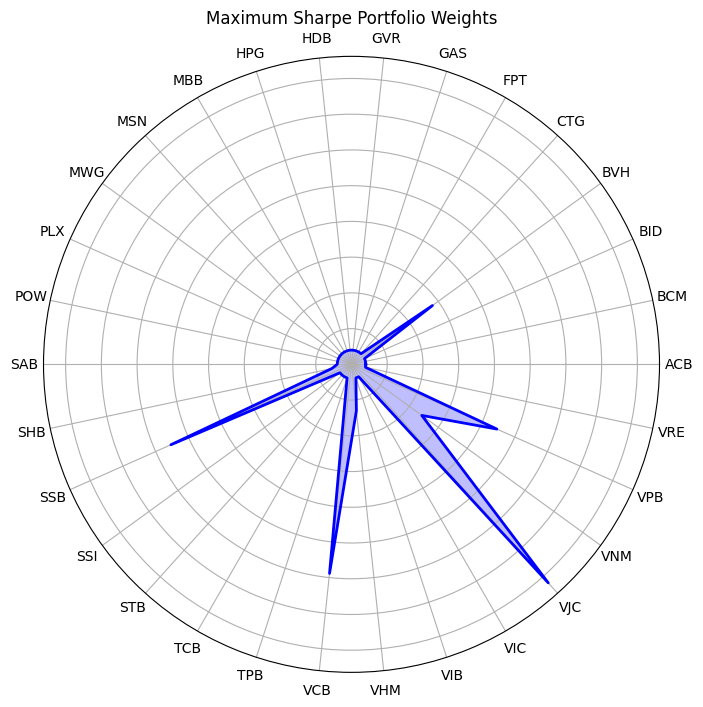

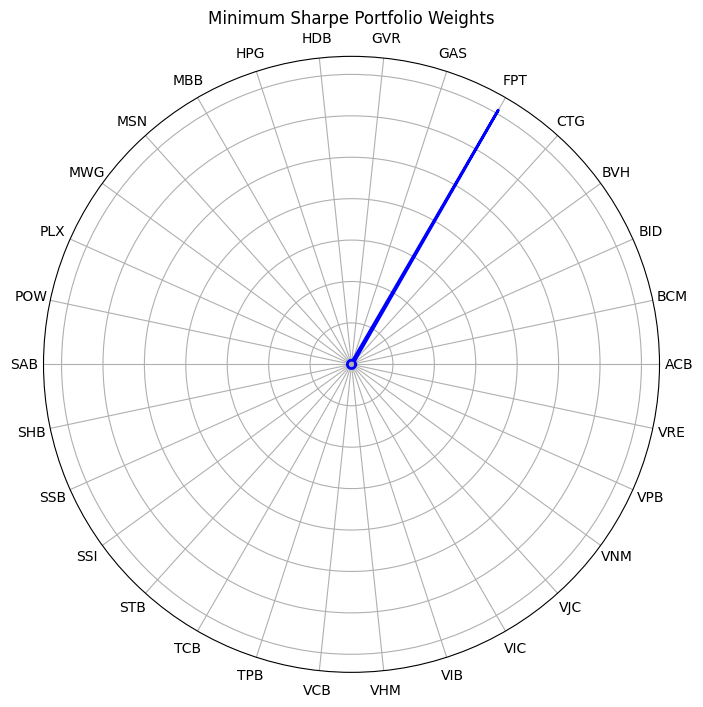

In [10]:
# Get the weights from the Maximum Sharpe portfolio
plot_portfolio_weights(
    result["Maximum Sharpe"]["Weights"], title="Maximum Sharpe Portfolio Weights"
)
plot_portfolio_weights(
    result["Minimum Sharpe"]["Weights"], title="Minimum Sharpe Portfolio Weights"
)

## VN100

In [11]:
df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN100"]))
]
# makes sure to only use stocks that have market value > 0
weights = df.pivot_table(index="time", values="market_value", columns="ticker")
weights.dropna(axis=1, inplace=True)
weights = weights.div(weights.sum(axis=0), axis=1)

returns_df = df[df["ticker"].isin(weights.columns)].pivot_table(
    index="time", values="log_return", columns="ticker"
)

Results array shape: (96, 102)


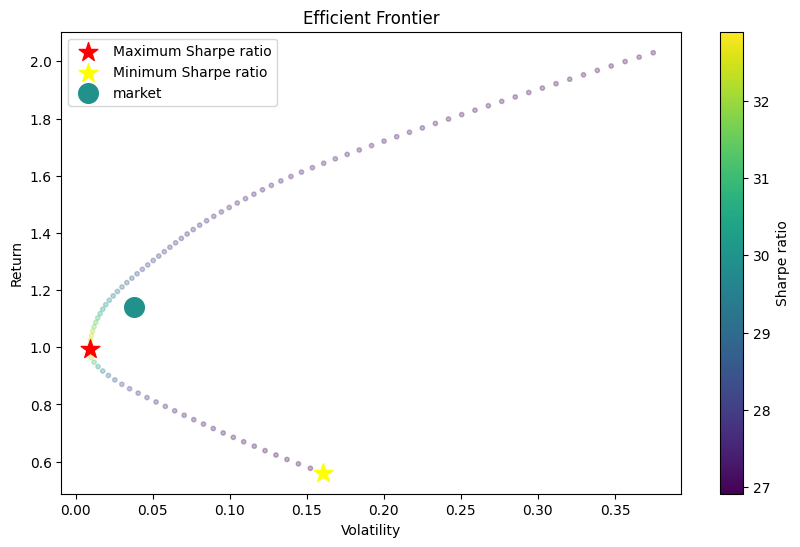

In [12]:
result, market_port = efficient_frontier(
    returns_df, market_df, num_portfolios=100, risk_free_rate=0.01, range0=(0, 1)
)
# it can be seen that with larger number of stock in the given portfolio, the max sharp and min sharp posion is just the same what we learned in the investment class.

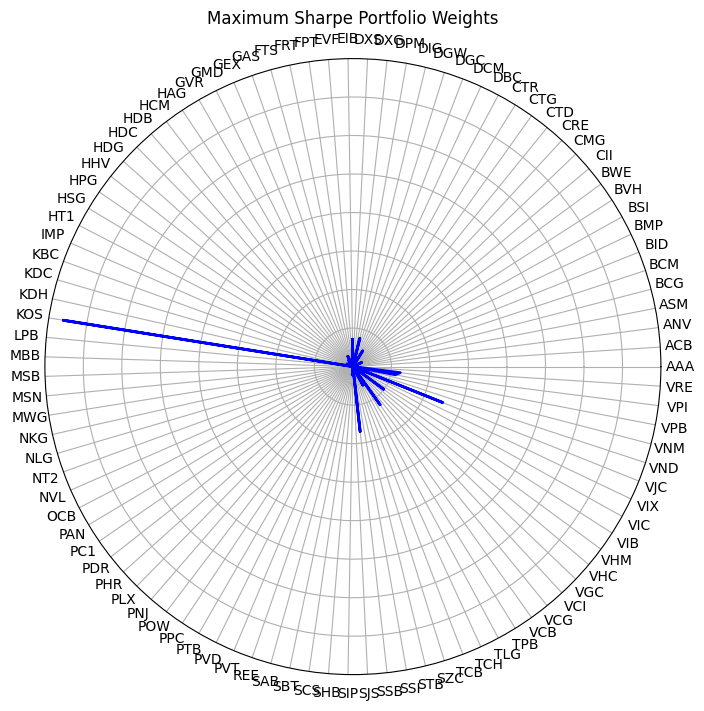

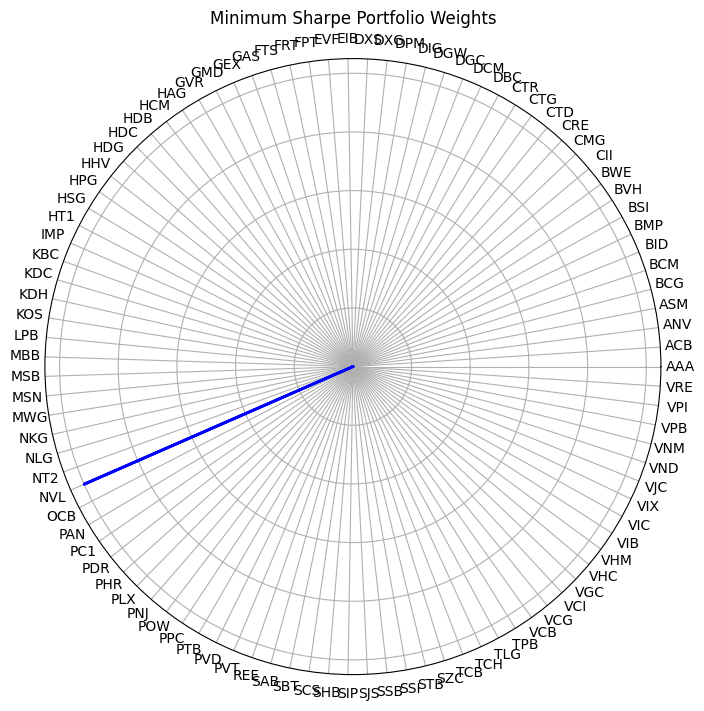

In [13]:
# Get the weights from the Maximum Sharpe portfolio
plot_portfolio_weights(
    result["Maximum Sharpe"]["Weights"], title="Maximum Sharpe Portfolio Weights"
)
plot_portfolio_weights(
    result["Minimum Sharpe"]["Weights"], title="Minimum Sharpe Portfolio Weights"
)

## HSX

In [14]:
df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["exchange"] == "HSX")
]
# makes sure to only use stocks that have market value > 0
weights = df.pivot_table(index="time", values="market_value", columns="ticker")
weights.dropna(axis=1, inplace=True)
weights = weights.div(weights.sum(axis=0), axis=1)

returns_df = df[df["ticker"].isin(weights.columns)].pivot_table(
    index="time", values="log_return", columns="ticker"
)

Results array shape: (84, 294)


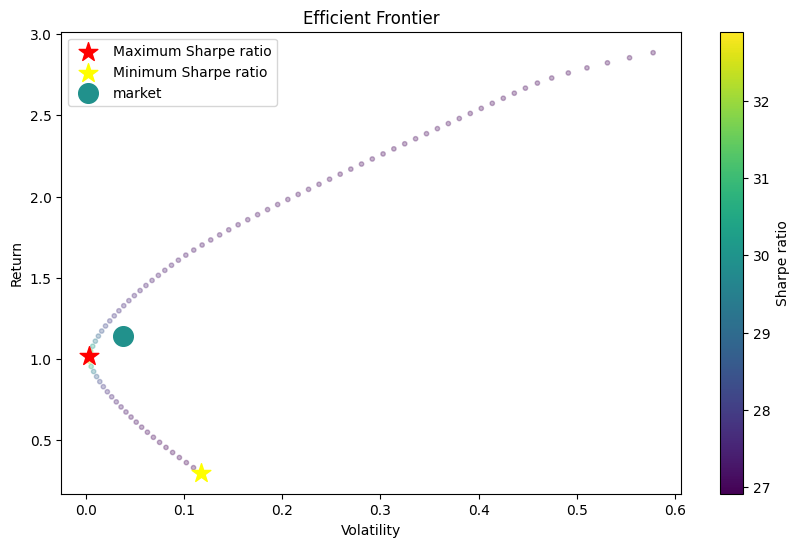

In [15]:
result, market_port = efficient_frontier(
    returns_df, market_df, num_portfolios=100, risk_free_rate=0.01, range0=(0, 1)
)

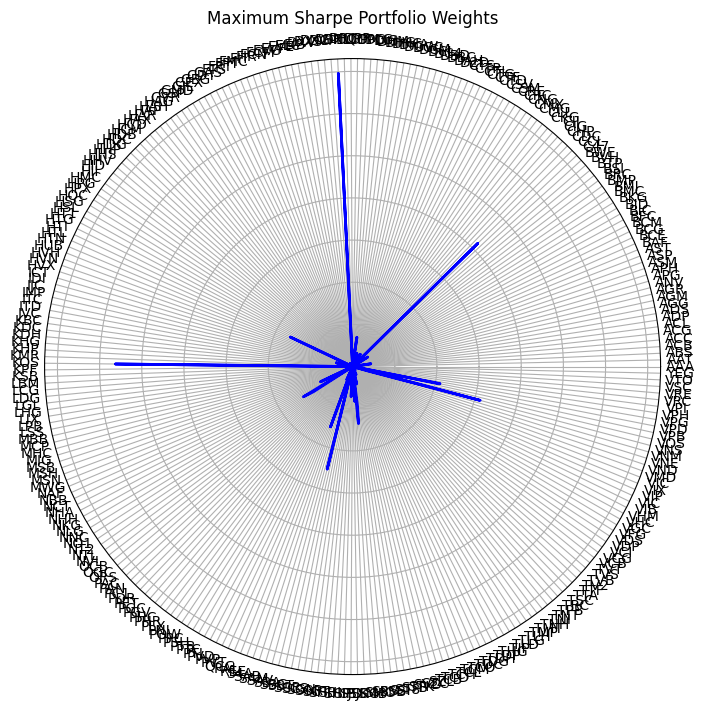

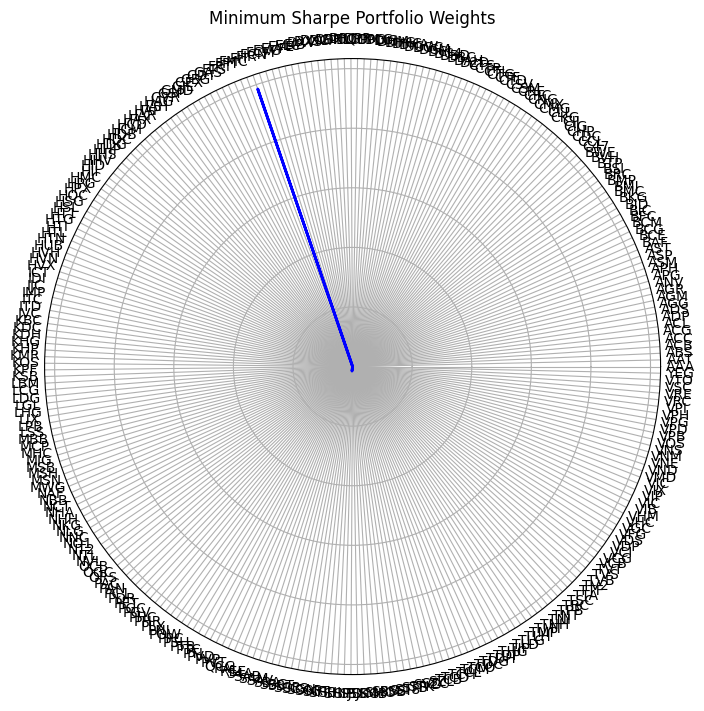

In [16]:
# Get the weights from the Maximum Sharpe portfolio
plot_portfolio_weights(
    result["Maximum Sharpe"]["Weights"], title="Maximum Sharpe Portfolio Weights"
)
plot_portfolio_weights(
    result["Minimum Sharpe"]["Weights"], title="Minimum Sharpe Portfolio Weights"
)